# **Similarity between two structures**

## **Install conda and rdkid**

In [1]:
# Install conda and rdkit
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-04-08 19:20:29--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   135MB/s    in 0.6s    

2021-04-08 19:20:30 (135 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

In [2]:
import pandas as pd
df = pd.read_csv('CHEMBL2842_2classes_data.csv')
df.head(5)

,molecule_chembl_id,canonical_smiles,pIC50,bioactivity_class
0,CHEMBL3645910,CCc1ncnc(-c2cc(F)c(C(=O)N3CCN4CCC[C@H]4C3)c(Cl...,10.154902,active
1,CHEMBL558955,COC(=O)N1CCC(n2ncc3c(N4CCOCC4)nc(-c4ccc(NC(=O)...,10.096910,active
2,CHEMBL566004,CCn1ncc2c(N3CC4CCC(C3)O4)nc(-c3ccc(NC(=O)Nc4cc...,10.000000,active
3,CHEMBL566216,CCn1ncc2c(N3CC4CCC(C3)O4)nc(-c3ccc(NC(=O)Nc4cc...,10.000000,active
4,CHEMBL585480,CCn1ncc2c(N3CC4CCC(C3)O4)nc(-c3ccc(NC(=O)Nc4cc...,10.000000,active


In [3]:
print(
    ' active',df['bioactivity_class'][df['bioactivity_class']=="active"].count(),'\n',
    'inactive',df['bioactivity_class'][df['bioactivity_class']=="inactive"].count(),'\n'
)

 active 662 
 inactive 664 



In [4]:
acive_canonical_smiles = df['canonical_smiles'][df['bioactivity_class']=="active"]
#acive_canonical_smiles.count()
#len(acive_canonical_smiles)
acive_canonical_smiles.head(3)

0    CCc1ncnc(-c2cc(F)c(C(=O)N3CCN4CCC[C@H]4C3)c(Cl...
1    COC(=O)N1CCC(n2ncc3c(N4CCOCC4)nc(-c4ccc(NC(=O)...
2    CCn1ncc2c(N3CC4CCC(C3)O4)nc(-c3ccc(NC(=O)Nc4cc...
Name: canonical_smiles, dtype: object

In [5]:
inacive_canonical_smiles = df['canonical_smiles'][df['bioactivity_class']=="inactive"].reset_index().drop(columns='index')
inacive_canonical_smiles = inacive_canonical_smiles['canonical_smiles']

In [6]:
inacive_canonical_smiles.count()
inacive_canonical_smiles.head(3)

0    O=C1COc2ccc(-c3cccc(NS(=O)(=O)c4ccc(F)cc4)c3)c...
1    COc1ccc(N2C(=O)COc3ccc(-c4cccc(NS(=O)(=O)c5ccc...
2    Cc1ccc(N2C(=O)COc3ccc(-c4cccc(NS(=O)(=O)c5ccc(...
Name: canonical_smiles, dtype: object

## **Calculate SMILE Similarity**

In [7]:
from rdkit import Chem,DataStructs

row_size = len(acive_canonical_smiles) #active
column_size = len(inacive_canonical_smiles) #inactive

table= [ [ 0 for i in range(column_size) ] for j in range(row_size) ]
#np.shape(table)
#pd.DataFrame(table)

for row in range(0,row_size):
  for col in range(0,column_size):
    act_comp = acive_canonical_smiles[row]
    inact_comp = inacive_canonical_smiles[col]

    act_mol = Chem.MolFromSmiles(str(act_comp))
    inact_mol = Chem.MolFromSmiles(str(inact_comp))

    # the default fingerprint is path-based:
    act_fp = Chem.RDKFingerprint(act_mol)
    inact_fp = Chem.RDKFingerprint(inact_mol)

    table[row][col]= DataStructs.TanimotoSimilarity(act_fp,inact_fp)

In [8]:
pd.DataFrame(table)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663
0,0.398182,0.399038,0.408213,0.402745,0.414442,0.404332,0.248820,0.335013,0.336909,0.393224,0.478938,0.333542,0.389945,0.333549,0.324937,0.324033,0.311412,0.336922,0.474239,0.388923,0.487986,0.502210,0.486440,0.402685,0.402081,0.418716,0.351064,0.472779,0.510970,0.399878,0.387492,0.344784,0.398555,0.482718,0.388923,0.400242,0.485294,0.380597,0.318528,0.434187,...,0.483555,0.347179,0.520316,0.476549,0.512113,0.455943,0.442789,0.442789,0.504893,0.488493,0.503691,0.491178,0.259064,0.491178,0.500291,0.480534,0.508782,0.360991,0.444581,0.447816,0.454545,0.445388,0.412748,0.526590,0.395591,0.390654,0.393035,0.428484,0.342857,0.493072,0.380482,0.426918,0.459508,0.358360,0.418798,0.537297,0.536290,0.390536,0.372436,0.343909
1,0.404881,0.399629,0.408189,0.405157,0.436076,0.401604,0.262341,0.345098,0.347086,0.392791,0.473777,0.351369,0.412556,0.349324,0.341656,0.347074,0.330634,0.352475,0.561348,0.392766,0.472738,0.500282,0.560521,0.415823,0.420650,0.426006,0.374181,0.470968,0.582043,0.412879,0.405492,0.344692,0.398268,0.523869,0.408629,0.421185,0.560837,0.401299,0.333333,0.491418,...,0.482861,0.473133,0.500570,0.476558,0.508631,0.446655,0.438415,0.438415,0.479420,0.491435,0.503488,0.490676,0.292308,0.490676,0.503584,0.478113,0.491399,0.390625,0.410747,0.427518,0.437996,0.419829,0.411055,0.488171,0.410305,0.391918,0.400643,0.427233,0.348883,0.469150,0.385842,0.434591,0.466296,0.366667,0.420795,0.548555,0.489423,0.479282,0.373184,0.392011
2,0.392630,0.381398,0.385625,0.388820,0.438027,0.384279,0.255965,0.330458,0.334221,0.375236,0.470270,0.335979,0.413001,0.347193,0.325117,0.342177,0.325276,0.331554,0.545338,0.380155,0.457210,0.500000,0.544884,0.406310,0.402966,0.417769,0.372733,0.457838,0.555970,0.401539,0.392996,0.332667,0.382592,0.527027,0.395364,0.408189,0.545863,0.401465,0.317450,0.487995,...,0.461035,0.484848,0.472032,0.460708,0.484971,0.431971,0.422579,0.422579,0.458844,0.471429,0.481287,0.471798,0.279401,0.471798,0.497872,0.457094,0.475391,0.394244,0.417408,0.430101,0.439024,0.425786,0.418848,0.472028,0.408854,0.402916,0.408217,0.433526,0.339585,0.454385,0.382008,0.445814,0.467089,0.365952,0.418750,0.543798,0.480278,0.484719,0.374491,0.385201
3,0.390775,0.380353,0.389873,0.386108,0.433703,0.383260,0.256223,0.331544,0.336253,0.374128,0.453293,0.336230,0.408460,0.344755,0.327040,0.340659,0.323570,0.338983,0.543746,0.378168,0.451708,0.492201,0.547242,0.405458,0.407577,0.416137,0.371525,0.447948,0.554511,0.399741,0.392016,0.331987,0.381554,0.519380,0.394412,0.405545,0.542285,0.396783,0.319293,0.485939,...,0.458957,0.491215,0.461714,0.460375,0.483984,0.429625,0.419255,0.419255,0.457647,0.471188,0.480259,0.471564,0.281792,0.471564,0.490543,0.455069,0.467480,0.387618,0.402284,0.425856,0.430364,0.420620,0.408793,0.470934,0.404325,0.389920,0.395225,0.424613,0.333558,0.446281,0.378201,0.433117,0.456563,0.360999,0.418033,0.533255,0.476663,0.487770,0.371409,0.386984
4,0.391443,0.381910,0.391414,0.387640,0.435179,0.383940,0.256560,0.329773,0.335345,0.375712,0.458957,0.335329,0.409091,0.346583,0.326174,0.340629,0.322693,0.338057,0.541935,0.377994,0.452996,0.495095,0.544479,0.406088,0.408203,0.417617,0.372297,0.450119,0.552714,0.399485,0.392694,0.332886,0.383113,0.521599,0.395078,0.406170,0.541479,0.397462,0.318458,0.487280,...,0.460251,0.486192,0.466286,0.459036,0.484321,0.430147,0.420694,0.420694,0.459777,0.469815,0.480611,0.471943,0.282937,0.471943,0.490876,0.452982,0.473837,0.387399,0.403797,0.423707,0.430000,0.421185,0.406658,0.470451,0.404047,0.391534,0.395902,0.421525,0.333557,0.451004,0.378025,0.433657,0.455177,0.360887,0.422180,0.535253,0.483928,0.481799,0.370320,0.390636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [9]:
import numpy as np

pd.DataFrame(table).to_csv("mTOR_EDA_similarity_matrix.csv", index=None)

## **Heat Map of Similarity**

In [10]:
import pandas as pd

df2 = pd.read_csv('mTOR_EDA_similarity_matrix.csv')
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663
0,0.398182,0.399038,0.408213,0.402745,0.414442,0.404332,0.248820,0.335013,0.336909,0.393224,0.478938,0.333542,0.389945,0.333549,0.324937,0.324033,0.311412,0.336922,0.474239,0.388923,0.487986,0.502210,0.486440,0.402685,0.402081,0.418716,0.351064,0.472779,0.510970,0.399878,0.387492,0.344784,0.398555,0.482718,0.388923,0.400242,0.485294,0.380597,0.318528,0.434187,...,0.483555,0.347179,0.520316,0.476549,0.512113,0.455943,0.442789,0.442789,0.504893,0.488493,0.503691,0.491178,0.259064,0.491178,0.500291,0.480534,0.508782,0.360991,0.444581,0.447816,0.454545,0.445388,0.412748,0.526590,0.395591,0.390654,0.393035,0.428484,0.342857,0.493072,0.380482,0.426918,0.459508,0.358360,0.418798,0.537297,0.536290,0.390536,0.372436,0.343909
1,0.404881,0.399629,0.408189,0.405157,0.436076,0.401604,0.262341,0.345098,0.347086,0.392791,0.473777,0.351369,0.412556,0.349324,0.341656,0.347074,0.330634,0.352475,0.561348,0.392766,0.472738,0.500282,0.560521,0.415823,0.420650,0.426006,0.374181,0.470968,0.582043,0.412879,0.405492,0.344692,0.398268,0.523869,0.408629,0.421185,0.560837,0.401299,0.333333,0.491418,...,0.482861,0.473133,0.500570,0.476558,0.508631,0.446655,0.438415,0.438415,0.479420,0.491435,0.503488,0.490676,0.292308,0.490676,0.503584,0.478113,0.491399,0.390625,0.410747,0.427518,0.437996,0.419829,0.411055,0.488171,0.410305,0.391918,0.400643,0.427233,0.348883,0.469150,0.385842,0.434591,0.466296,0.366667,0.420795,0.548555,0.489423,0.479282,0.373184,0.392011
2,0.392630,0.381398,0.385625,0.388820,0.438027,0.384279,0.255965,0.330458,0.334221,0.375236,0.470270,0.335979,0.413001,0.347193,0.325117,0.342177,0.325276,0.331554,0.545338,0.380155,0.457210,0.500000,0.544884,0.406310,0.402966,0.417769,0.372733,0.457838,0.555970,0.401539,0.392996,0.332667,0.382592,0.527027,0.395364,0.408189,0.545863,0.401465,0.317450,0.487995,...,0.461035,0.484848,0.472032,0.460708,0.484971,0.431971,0.422579,0.422579,0.458844,0.471429,0.481287,0.471798,0.279401,0.471798,0.497872,0.457094,0.475391,0.394244,0.417408,0.430101,0.439024,0.425786,0.418848,0.472028,0.408854,0.402916,0.408217,0.433526,0.339585,0.454385,0.382008,0.445814,0.467089,0.365952,0.418750,0.543798,0.480278,0.484719,0.374491,0.385201
3,0.390775,0.380353,0.389873,0.386108,0.433703,0.383260,0.256223,0.331544,0.336253,0.374128,0.453293,0.336230,0.408460,0.344755,0.327040,0.340659,0.323570,0.338983,0.543746,0.378168,0.451708,0.492201,0.547242,0.405458,0.407577,0.416137,0.371525,0.447948,0.554511,0.399741,0.392016,0.331987,0.381554,0.519380,0.394412,0.405545,0.542285,0.396783,0.319293,0.485939,...,0.458957,0.491215,0.461714,0.460375,0.483984,0.429625,0.419255,0.419255,0.457647,0.471188,0.480259,0.471564,0.281792,0.471564,0.490543,0.455069,0.467480,0.387618,0.402284,0.425856,0.430364,0.420620,0.408793,0.470934,0.404325,0.389920,0.395225,0.424613,0.333558,0.446281,0.378201,0.433117,0.456563,0.360999,0.418033,0.533255,0.476663,0.487770,0.371409,0.386984
4,0.391443,0.381910,0.391414,0.387640,0.435179,0.383940,0.256560,0.329773,0.335345,0.375712,0.458957,0.335329,0.409091,0.346583,0.326174,0.340629,0.322693,0.338057,0.541935,0.377994,0.452996,0.495095,0.544479,0.406088,0.408203,0.417617,0.372297,0.450119,0.552714,0.399485,0.392694,0.332886,0.383113,0.521599,0.395078,0.406170,0.541479,0.397462,0.318458,0.487280,...,0.460251,0.486192,0.466286,0.459036,0.484321,0.430147,0.420694,0.420694,0.459777,0.469815,0.480611,0.471943,0.282937,0.471943,0.490876,0.452982,0.473837,0.387399,0.403797,0.423707,0.430000,0.421185,0.406658,0.470451,0.404047,0.391534,0.395902,0.421525,0.333557,0.451004,0.378025,0.433657,0.455177,0.360887,0.422180,0.535253,0.483928,0.481799,0.370320,0.390636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

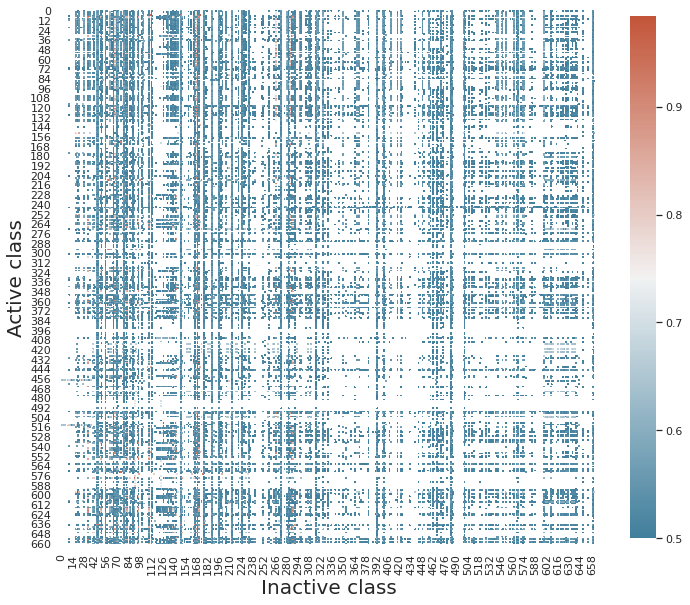

In [11]:
#from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.abs(df2) < 0.5

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df2, mask=mask, cmap=cmap, cbar_kws={"shrink":.8}, square=True) #, vmax=.3, center=0, square=True, linewidths=.5

plt.xlabel('Inactive class', fontsize=20)
plt.ylabel('Active class', fontsize=20)

#fig.suptitle('Correlation matrix of bioactivity classes', fontsize=15)

plt.savefig('mTOR_EDA_heatmap_similarity.pdf')